### Machine Learning using MNIST Dataset
1. Dataset: https://www.kaggle.com/c/digit-recognizer/data
---Download the dataset and upload the folder to your google drive
2. Problem statement: Handwritten digit recognization (0-9)
3. Type of problem: Classification, Supervised
4. Data type: Images stored in csv file
5. Performance Measures: Accuracy, Precision, Recall, Confusion Matrix
6. Feature Importance: Not required
7. Interpretability: We can provide nearest neighbors of the query image to justify why image is classified as 'this'

In [ ]:
#Connect to your google drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
#checking the available files
%cd /gdrive/My\ Drive/digit-recognizer
!ls -ltr


/gdrive/My Drive/digit-recognizer
total 125132
-rw------- 1 root root 51118296 Dec 11  2019 test.csv
-rw------- 1 root root   240909 Dec 11  2019 sample_submission.csv
-rw------- 1 root root 76775041 Dec 11  2019 train.csv


### Classification Algorithms:
1. K-Nearest Neighbor
2. Logistic Regression (one-vs-rest)
3. SVM Classifier
4. Decision Tree
5. Random Forest
6. XGBoost

### Other Libraries:
1. GridsearchCV for hyperparameter tuning
2. randomsearchCV for hyperparameter tuning
3. Reference Link: https://stackoverflow.com/questions/57426633/what-is-randomsearchcv-and-gridsearchcv

#Data Visualization
1. Principal Component Analysis
2. t-SNE
- Reference Link: https://www.datacamp.com/community/tutorials/introduction-t-sne

#Import Library that going to require in this Tutorial

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns
import random

from tqdm import tqdm

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from random import randint

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#from pactools.grid_search import GridSearchCVProgressBar

from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Read data from two files train.csv and test.csv
1. train.csv file contains images (28 x 28) representaed as rows (784 dimensional) and a label as digit
2. test.csv file contains images (28 x 28) representaed as rows (784 dimensional)
3. sample_submission.csv is the file which contains test image number and corresponding predicted digit
   Soultion is submitted in sample_submission.csv file

In [ ]:
#%%timeit -n 10
# 10 loops, best of 3: 7.07 s per loop
mnist_train = pd.read_csv("train.csv")
mnist_test  = pd.read_csv("test.csv")

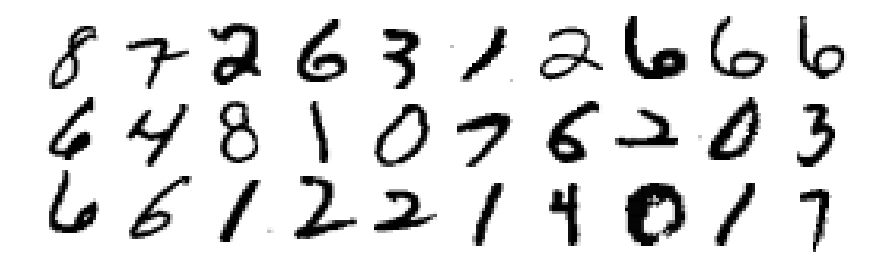

In [ ]:
# VISUALIZE DATA
samples = mnist_train.iloc[5000:5030,1:].values
plt.figure(figsize=(15,4.5))
for i in range(30):
    plt.subplot(3, 10, i+1)
    plt.imshow(samples[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

In [ ]:
mnist_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(mnist_train.shape, mnist_test.shape)

((42000, 785), (28000, 784))


### Check whether data is balanced or imbalanced

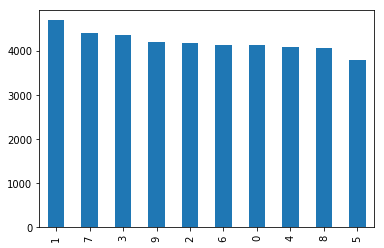

In [ ]:
#%%timeit
#345 ms
_ = mnist_train['label'].value_counts().plot(kind='bar')
plt.show()

From above figure one can conclude that dataset is balanced

In [ ]:
#%%time
#Wall time: 14.6 s
X_raw = mnist_train.drop(['label'], axis = 1, inplace = False)
y = mnist_train['label']

In [ ]:
#Data is being Scaled now to make it uniform
#%%time
# Wall time: 28.5 s
arr = X_raw.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(arr)
X = pd.DataFrame(x_scaled)

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [ ]:
X.max()

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     1.0
13     1.0
14     1.0
15     1.0
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
      ... 
754    0.0
755    0.0
756    0.0
757    0.0
758    0.0
759    0.0
760    0.0
761    1.0
762    1.0
763    1.0
764    1.0
765    1.0
766    1.0
767    1.0
768    1.0
769    1.0
770    1.0
771    1.0
772    1.0
773    1.0
774    1.0
775    1.0
776    1.0
777    1.0
778    1.0
779    1.0
780    0.0
781    0.0
782    0.0
783    0.0
Length: 784, dtype: float64

#Principal Component Analysis for data visualization

we convert 784 dimensional data into 2 dimensional to visualize the data in 2D

In [ ]:
# %%timeit -n 3
# 3 loops, best of 3: 1.66 s per loop
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(X)
principal_DF = pd.DataFrame(data = principal_components, columns = ['component1', 'component2'])
final_DF = pd.concat( [principal_DF, mnist_train[['label']]], axis = 1)

['#924770', '#6DCBAC', '#93FDCA', '#34C2DA', '#D035D2', '#D2D6B8', '#A749F9', '#2904CD', '#854A96', '#53E8EB']


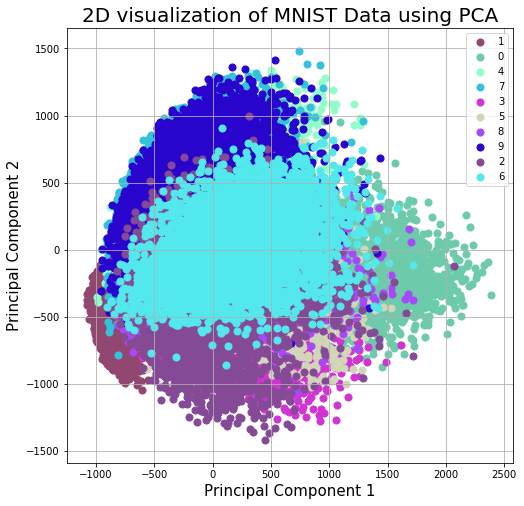

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = plt.subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D visualization of MNIST Data using PCA', fontsize = 20)

targets = list(mnist_train['label'].unique())
random.seed(10)
colors = []
for i in range(10):
    colors.append('#%06X' % randint(0, 0xFFFFFF))
print(colors)
for target, color in zip(targets,colors):
    indicesToKeep = final_DF['label'] == target
    ax.scatter(final_DF.loc[indicesToKeep, 'component1'], final_DF.loc[indicesToKeep,'component2'], c = color, s=50)
ax.legend(targets)
ax.grid()


From above figure it is obvious conclusion is that data is not seperable. However this is not the case as PCA has some drawbacks.

# Next technique we try is t-SNE

In [ ]:
%%time
# Wall time: 1h 17min 10s
tsneData = TSNE(random_state=10).fit_transform(X)

In [ ]:
def ScatterPlotTsne(X,y):
    num_digits= len(np.unique(y))
    palette = np.array(sns.color_palette("hls", num_digits))
    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(X[:,0], X[:,1], lw=0, s=40, c=palette[y.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    txts = []
    for i in range(num_digits):
        xtext, ytext = np.median(X[y == i, :], axis = 0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            path_effects.Stroke(linewidth=5, foreground="w"),
            path_effects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [ ]:
ScatterPlotTsne(tsneData,y)

#### From above figure we can say data is seperable as seperate clusters are formed for each digit

#Divide data into 3 parts
1. Train - To calculate nearest neighbors
2. cross-validation: To find optimal value of k (Hyperparameter)
3. Test: To test final accuracy of the model

In [ ]:
X_1, X_test, y_1, y_test = train_test_split(X,y,test_size = 0.25, random_state = 10)
X_train, X_cv, y_train, y_cv = train_test_split(X_1,y_1,test_size = 0.20, random_state = 10)
print(X_train.shape, X_test.shape, X_cv. shape, y_train.shape, y_test.shape, y_cv.shape)

((25200, 784), (10500, 784), (6300, 784), (25200,), (10500,), (6300,))


# KNN Classifier

In [ ]:
def trainKNN(X_train, y_train, k):
    """Function to train model using KNN classifier
    Takes argumenst as training dataset, k-value and returns classifier
    """
    classifier = KNeighborsClassifier(n_neighbors=k, n_jobs = -1)
    classifier.fit(X_train,y_train)
    return classifier

In [ ]:
def predictClassifier(X_test, classifier):
    """Function to predict labels using classifier
       Takes argumenst as test/cv dataset, and returns predicted values by model
    """
    y_pred = classifier.predict(X_test)
    return y_pred

In [ ]:
def calculateAccuracy(y_pred, y_test):
    """Function to check accuracy of the model. Takes input arguments as actual and predicted values
       and returns accuracy score
    """
    accuracy = accuracy_score(y_pred, y_test)
    return accuracy

In [ ]:
#%%time
# Wall time: 17min 52s
kvalues = [x for x in range(1,50, 6)]
AccuracyList = []
for k in tqdm(kvalues):
    knnClassifier = trainKNN(X_train, y_train, k)
    y_pred = predictClassifier(X_cv, knnClassifier)
    acc = calculateAccuracy(y_pred, y_cv)
    AccuracyList.append(acc)

100%|██████████| 9/9 [17:51<00:00, 118.83s/it]


Wall time: 17min 52s


In [ ]:
AccuracyList

[0.9633333333333334,
 0.9652380952380952,
 0.9611111111111111,
 0.9568253968253968,
 0.9555555555555556,
 0.9517460317460318,
 0.947936507936508,
 0.9457142857142857,
 0.9442857142857143]

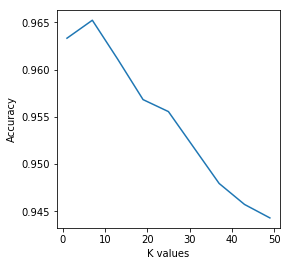

In [ ]:
f = plt.figure(figsize = (4,4))
ax = plt.subplot()
plt.plot(kvalues,AccuracyList)
ax.set_xlabel('K values', fontsize = 10)
ax.set_ylabel('Accuracy', fontsize = 10)
plt.show()

In [ ]:
#%%time
# Wall time: 3min 49s
clf = trainKNN(X_train,y_train, 7)
y_pred = predictClassifier(X_test, knnClassifier)
acc = calculateAccuracy(y_pred, y_test)
print("Final Accuracy: ",acc)

('Final Accuracy: ', 0.9406666666666667)
Wall time: 3min 49s


################# Confusion Matrix ####################


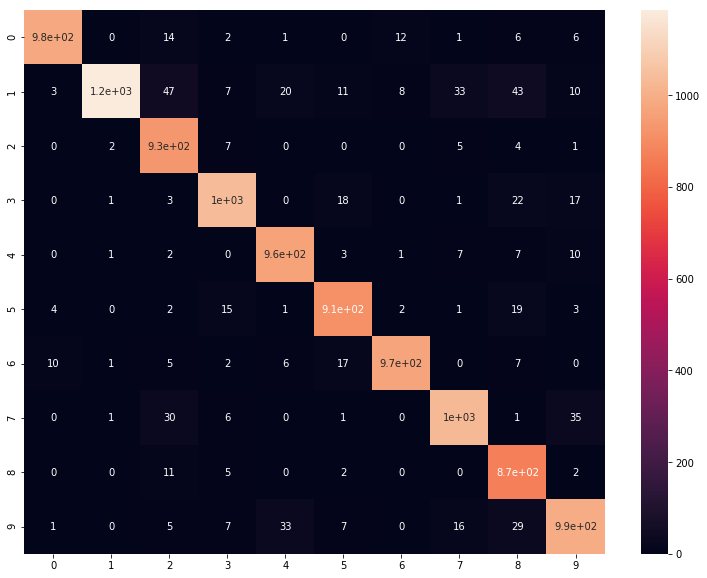

In [ ]:
num_digits= np.unique(y)
cf = confusion_matrix(y_pred,y_test, labels = num_digits )
print("################# Confusion Matrix ####################")
fig = plt.figure(figsize = (13,10))
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); #annot=True to annotate cells


# SVM Classifier
GridSearch SVM Classifier One-vs-Rest

*   List item
*   List item


In [ ]:
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [ ]:
%%time
#Wall time: 8h 21min 8s
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_1, y_1)

In [ ]:
svm_model.best_estimator_

In [ ]:
svm_model.best_score_

In [ ]:
svm_model.cv_results_

In [ ]:
%%time
#Wall time: 6min 14s
bestModel = svm_model.best_estimator_
bestModel.fit(X_train,y_train)
yPred = bestModel.predict(X_test)
accuracy = accuracy_score(y_test,yPred)

In [ ]:
print("svm accuracy = ",accuracy)

#Logistic Regression

In [ ]:
#%time
logistic = LogisticRegression(solver='saga', tol=1e-3,n_jobs=2,multi_class = "multinomial")
randVals = []
for i in range(4):
    randVals.append(random.uniform(0,4))
distributions = dict(C=randVals, penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions, random_state=0, verbose = 1000)
search = clf.fit(X_1, y_1)

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:271: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] penalty=l2, C=0.0687378320373 ...................................
[CV]  penalty=l2, C=0.0687378320373, score=0.919562113279, total=  39.2s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.3s remaining:    0.0s
[CV] penalty=l2, C=0.0687378320373 ...................................
[CV]  penalty=l2, C=0.0687378320373, score=0.917611201067, total=  33.3s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.2min remaining:    0.0s
[CV] penalty=l2, C=0.0687378320373 ...................................
[CV]  penalty=l2, C=0.0687378320373, score=0.915110518293, total=  34.4s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.8min remaining:    0.0s
[CV] penalty=l1, C=0.0687378320373 ...................................
[CV]  penalty=l1, C=0.0687378320373, score=0.905473584008, total= 2.2min
[Parallel(n_jobs=1)]: Done   4 out of   4 |

In [ ]:
print(clf.best_estimator_)
print(clf.best_score_)

NameError: ignored

In [ ]:
#%%time
# Wall time: 2min 50s
best_clf = clf.best_estimator_
best_clf.fit(X_1,y_1)

LogisticRegression(C=0.0687378320373, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=2, penalty='l2',
          random_state=None, solver='saga', tol=0.001, verbose=0,
          warm_start=False)

In [ ]:
#%%time
y_predLR = best_clf.predict(X_test)
acc = accuracy_score(y_test,y_predLR)
print(acc)

0.916


#Decision Tress Classifier

In [ ]:
#%%time
# Wall time: 1min 54s
maxDepth = [4,6,8,10,12,15,20,30,50,80, 120]
trainAcc = []
CVAcc = []
for depth in tqdm(maxDepth):
    clfDT = DecisionTreeClassifier(criterion='gini',max_depth = depth)
    clfDT.fit(X_train, y_train)
    y_predDTtrain = clfDT.predict(X_train)
    y_predDTcv = clfDT.predict(X_cv)
    accTr = accuracy_score(y_train, y_predDTtrain)
    accCv = accuracy_score(y_cv, y_predDTcv)
    trainAcc.append(accTr)
    CVAcc.append(accCv)

100%|██████████| 11/11 [00:56<00:00,  6.63s/it]

CPU times: user 56.5 s, sys: 76.8 ms, total: 56.5 s
Wall time: 56.6 s


In [ ]:
print(trainAcc)
print(CVAcc)

[0.6329761904761905, 0.7385714285714285, 0.8384920634920635, 0.9097222222222222, 0.9556349206349206, 0.9851190476190477, 0.9958333333333333, 0.9993253968253968, 1.0, 1.0, 1.0]
[0.6395238095238095, 0.74, 0.8131746031746032, 0.8436507936507937, 0.8484126984126984, 0.8539682539682539, 0.8525396825396825, 0.8488888888888889, 0.849047619047619, 0.8468253968253968, 0.8523809523809524]


In [ ]:
def plotCVandTrainAccuracyAndError(CVAcc,trainAcc,maxDepth):
    fig = plt.figure(figsize = (10,5))
    ax = plt.subplot(1,2,1)
    ax.set_xlabel('Maximum Depth', fontsize = 10)
    ax.set_ylabel('Accuracy', fontsize = 10)
    ax.set_title('Check fitting of model', fontsize = 10)

    plt.plot(maxDepth,CVAcc,label='CV Accuracy')
    plt.plot(maxDepth,trainAcc,label='train Accuracy')
    ax.legend()

    trainError = [1-x for x in trainAcc]
    CVError    = [1-x for x in CVAcc]
    ax = plt.subplot(1,2,2)
    ax.set_xlabel('Maximum Depth', fontsize = 10)
    ax.set_ylabel('Error', fontsize = 10)
    ax.set_title('Check fitting of model', fontsize = 10)

    plt.plot(maxDepth,CVError,label='CV Error')
    plt.plot(maxDepth,trainError,label='train Error')
    ax.legend()

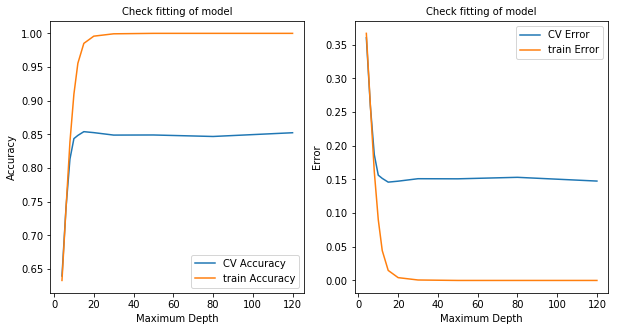

In [ ]:
plotCVandTrainAccuracyAndError(CVAcc,trainAcc,maxDepth)

In [ ]:
clfDT = DecisionTreeClassifier(criterion='gini',max_depth = 15)
clfDT.fit(X_train, y_train)
y_pred = clfDT.predict(X_test)

print("Final Accuracy DT: ",accuracy_score(y_test,y_pred))

('Final Accuracy DT: ', 0.848)


#Random Forest Classifier


In [ ]:
NoEstimators = [5,50,100,200,400,1000] # [10,20,50,70,100,130,150,190,230,290,370,450,550,700] #[100,105,110,115,120,125]
trainAcc = []
CVAcc = []

In [ ]:
for est in tqdm(NoEstimators):
    clfRF = RandomForestClassifier(n_estimators=est, criterion='gini')
    clfRF.fit(X_train, y_train)
    y_predRFtrain = clfRF.predict(X_train)
    y_predRFcv = clfRF.predict(X_cv)
    accTr = accuracy_score(y_train, y_predRFtrain)
    accCv = accuracy_score(y_cv, y_predRFcv)
    trainAcc.append(accTr)
    CVAcc.append(accCv)

100%|██████████| 6/6 [05:11<00:00, 75.92s/it]


In [ ]:
print(NoEstimators)
print(trainAcc)
print(CVAcc)

NameError: ignored

In [ ]:
def plotCVandTrainAccuracyAndErrorEstimators(CVAcc,trainAcc,NoEstimators):
    fig = plt.figure(figsize = (10,5))
    ax = plt.subplot(1,2,1)
    ax.set_xlabel('No of Estimators', fontsize = 10)
    ax.set_ylabel('Accuracy', fontsize = 10)
    ax.set_title('Check fitting of model', fontsize = 10)

    plt.plot(maxDepth,CVAcc,label='CV Accuracy')
    plt.plot(maxDepth,trainAcc,label='train Accuracy')
    ax.legend()

    trainError = [1-x for x in trainAcc]
    CVError    = [1-x for x in CVAcc]
    ax = plt.subplot(1,2,2)
    ax.set_xlabel('No of Estimators', fontsize = 10)
    ax.set_ylabel('Error', fontsize = 10)
    ax.set_title('Check fitting of model', fontsize = 10)

    plt.plot(maxDepth,CVError,label='CV Error')
    plt.plot(maxDepth,trainError,label='train Error')
    ax.legend()

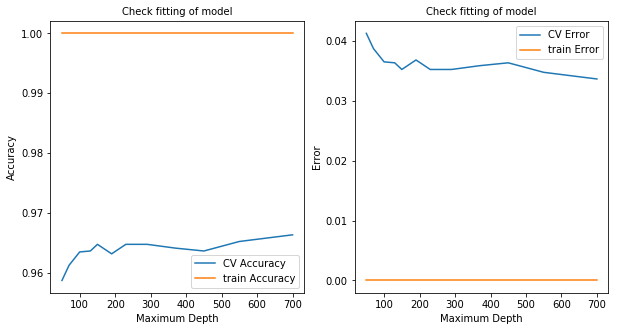

In [ ]:
plotCVandTrainAccuracyAndErrorEstimators(CVAcc,trainAcc,NoEstimators)

In [ ]:
maxAccuracy = max(CVAcc)
maxAccuracy

0.9663492063492064

In [ ]:
clfRF = RandomForestClassifier(n_estimators=370, criterion='gini')
clfRF.fit(X_train, y_train)
y_predRF = clfRF.predict(X_test)
print("Final Accuracy RF: ",accuracy_score(y_test,y_predRF))

('Final Accuracy RF: ', 0.9627619047619047)


#XGBOOST

In [ ]:
!pip install xgboost

In [ ]:
etaVals = [0.1,0.3,0.5,0.6,0.8,0.9] # Shrinkage parameter as hyperparameter
#max_depth parameter we are changing as we know increasing this value may turn model into overfit
trainAcc = []
CVAcc = []
for e in etaVals:
    model = XGBClassifier(eta = e, nthread = 2)
    model.fit(X_train,y_train)
    y_predXGtrain = model.predict(X_train)
    y_predXGcv = model.predict(X_cv)
    accTr = accuracy_score(y_train, y_predXGtrain)
    accCv = accuracy_score(y_cv, y_predXGcv)
    trainAcc.append(accTr)
    CVAcc.append(accCv)

In [ ]:
plotCVandTrainAccuracyAndError(CVAcc,trainAcc,etaVals)

In [ ]:
def plotTestandTrainAccuracyAndError(TestAcc,trainAcc,maxDepth):
    fig = plt.figure(figsize = (10,5))
    ax = plt.subplot(1,2,1)
    ax.set_xlabel('Maximum Depth', fontsize = 10)
    ax.set_ylabel('Accuracy', fontsize = 10)
    ax.set_title('Check fitting of model', fontsize = 10)

    plt.plot(maxDepth,TestAcc,label='Test Accuracy')
    plt.plot(maxDepth,trainAcc,label='train Accuracy')
    ax.legend()

    trainError = [1-x for x in trainAcc]
    TestError    = [1-x for x in TestAcc]
    ax = plt.subplot(1,2,2)
    ax.set_xlabel('Maximum Depth', fontsize = 10)
    ax.set_ylabel('Error', fontsize = 10)
    ax.set_title('Check fitting of model', fontsize = 10)

    plt.plot(maxDepth,TestError,label='Test Error')
    plt.plot(maxDepth,trainError,label='train Error')
    ax.legend()

In [ ]:
TestAcc = []
for e in tqdm(etaVals):
    model = XGBClassifier(eta = e, nthread = 2)
    model.fit(X_train,y_train)
    y_predXGTest = model.predict(X_test)
    accTest = accuracy_score(y_test, y_predXGTest)
    TestAcc.append(accTest)

plotTestandTrainAccuracyAndError(TestAcc,trainAcc,etaVals)

# Final Accuracies
    1. KNN                   0.94066  
    2. Logistic Regression   0.9125
    3. SVM                   0.95819
    4. Decision Tree         0.84923
    5. Random Forest         0.964
    6. XGBOOST               0.9325